In [1]:
import torch
model = torch.hub.load('mateuszbuda/brain-segmentation-pytorch', 'unet',
    in_channels=3, out_channels=1, init_features=32, pretrained=True)

C:\Users\ian\anaconda3\lib\site-packages\torch\hub.py:267: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/mateuszbuda/brain-segmentation-pytorch/zipball/master" to C:\Users\ian/.cache\torch\hub\master.zip
Downloading: "https://github.com/mateuszbuda/brain-segmentation-pytorch/releases/download/v1.0/unet-e012d006.pt" to C:\Users\ian/.cache\torch\hub\checkpoints\unet-e012d006.pt


In [2]:
model

UNet(
  (encoder1): Sequential(
    (enc1conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (enc1norm1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (enc1relu1): ReLU(inplace=True)
    (enc1conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (enc1norm2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (enc1relu2): ReLU(inplace=True)
  )
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (encoder2): Sequential(
    (enc2conv1): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (enc2norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (enc2relu1): ReLU(inplace=True)
    (enc2conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (enc2norm2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, tra

In [3]:
import urllib

url="https://github.com/mateuszbuda/brain-segmentation-pytorch/" + \
    "raw/master/assets/TCGA_CS_4944.png"
filename = "U_Net/TCGA_CS_4944.png"
urllib.request.urlretrieve(url, filename)

('U_Net/TCGA_CS_4944.png', <http.client.HTTPMessage at 0x1f2bf049520>)

In [7]:
import numpy as np
from PIL import Image
from torchvision import transforms

In [8]:
input_image = Image.open(filename)

In [17]:
m, s = np.mean(input_image, axis = (0, 1)), np.std(input_image, axis = (0, 1))
preprocess = transforms.Compose([transforms.ToTensor()])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0)
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model = model.to('cuda')
    
with torch.no_grad():
    output = model(input_batch)
    
print(torch.round(output[0]))

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])


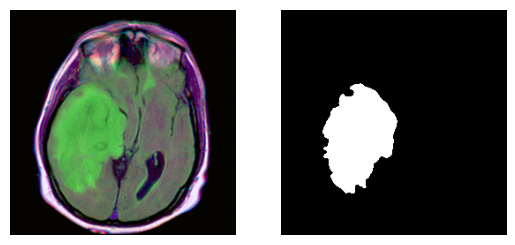

In [18]:
import matplotlib.pyplot as plt

# 原圖
plt.subplot(1,2,1)
plt.imshow(plt.imread(filename))
plt.axis('off')

# 預測結果
plt.subplot(1,2,2)
plt.imshow(torch.round(output[0]).cpu().numpy().reshape(256, 256), cmap='gray')
plt.axis('off')
plt.show()